In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data= pd.read_csv(r"C:\Users\vinee\OneDrive\Desktop\AI PROJECT\adult 3.csv")

In [3]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
data.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [5]:
data.tail(20)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48822,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K
48823,72,?,129912,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,25,United-States,<=50K
48824,45,Local-gov,119199,Assoc-acdm,12,Divorced,Prof-specialty,Unmarried,White,Female,0,0,48,United-States,<=50K
48825,31,Private,199655,Masters,14,Divorced,Other-service,Not-in-family,Other,Female,0,0,30,United-States,<=50K
48826,39,Local-gov,111499,Assoc-acdm,12,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,20,United-States,>50K
48827,37,Private,198216,Assoc-acdm,12,Divorced,Tech-support,Not-in-family,White,Female,0,0,40,United-States,<=50K
48828,43,Private,260761,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,Mexico,<=50K
48829,65,Self-emp-not-inc,99359,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Male,1086,0,60,United-States,<=50K
48830,43,State-gov,255835,Some-college,10,Divorced,Adm-clerical,Other-relative,White,Female,0,0,40,United-States,<=50K
48831,43,Self-emp-not-inc,27242,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,50,United-States,<=50K


In [6]:
data.isna()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48838,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48839,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48840,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
data.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [8]:
data.shape

(48842, 15)

In [9]:
print(data.workclass.value_counts())


workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64


In [10]:
data.replace('?', np.nan, inplace=True)
for col in data.columns:
    if data[col].isnull().sum() > 0:
        data[col] = data[col].fillna(data[col].mode()[0])


In [11]:
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [12]:
print(data['occupation'].value_counts())

occupation
Prof-specialty       8981
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64


In [13]:
data['occupation'] = data['occupation'].replace('?', 'Others')
print(data['occupation'].value_counts())

occupation
Prof-specialty       8981
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64


In [14]:
data=data[data['workclass']!='Without-pay']
data=data[data['workclass']!='Never-worked']
print(data['workclass'].value_counts())

workclass
Private             36705
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Name: count, dtype: int64


In [15]:
print(data.relationship.value_counts())

relationship
Husband           19708
Not-in-family     12582
Own-child          7566
Unmarried          5123
Wife               2327
Other-relative     1505
Name: count, dtype: int64


In [16]:
print(data.gender.value_counts())

gender
Male      32629
Female    16182
Name: count, dtype: int64


In [17]:
data.shape

(48811, 15)

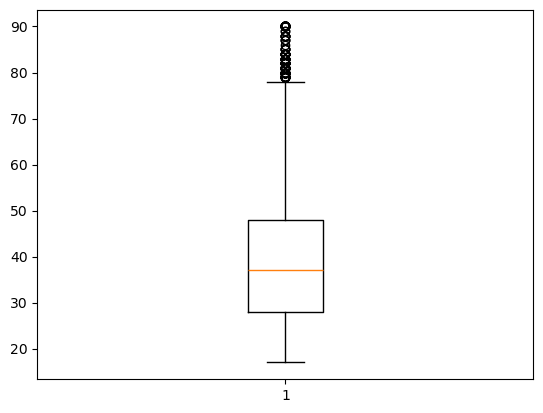

In [18]:
#outlier detection
import matplotlib.pyplot as plt   #visualization
plt.boxplot(data['age'])
plt.show()

In [19]:
data=data[(data['age']<=75)&(data['age']>=17)]

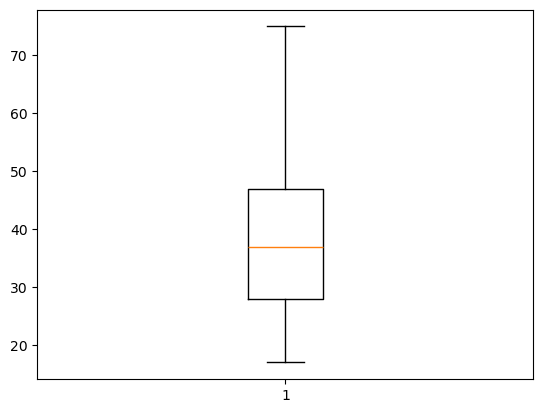

In [20]:
plt.boxplot(data['age'])
plt.show()

In [21]:
data.shape

(48438, 15)

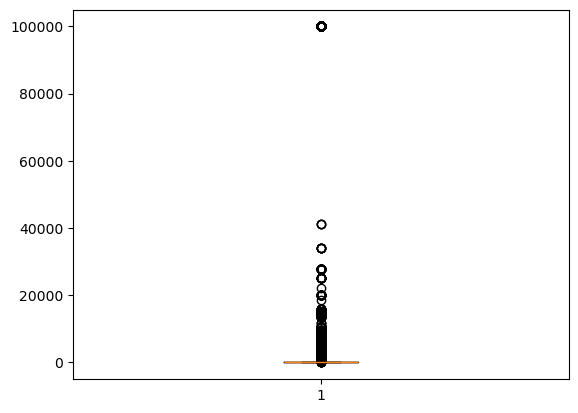

In [22]:
plt.boxplot(data['capital-gain'])
plt.show()

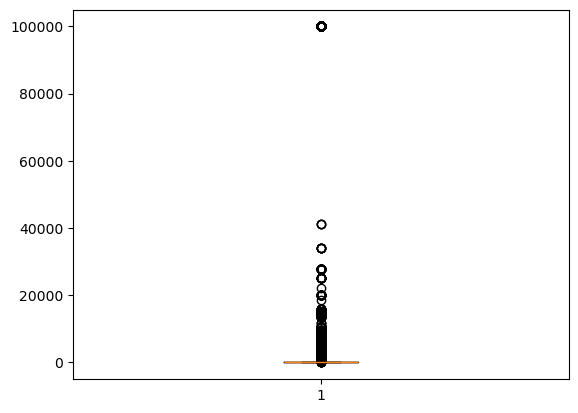

In [23]:
plt.boxplot(data['capital-gain'])
plt.show()

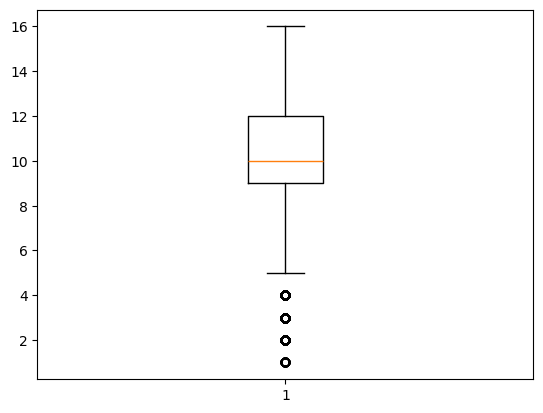

In [24]:
plt.boxplot(data['educational-num'])
plt.show()

In [25]:
data=data[(data['educational-num']<=16)&(data['educational-num']>=5)]

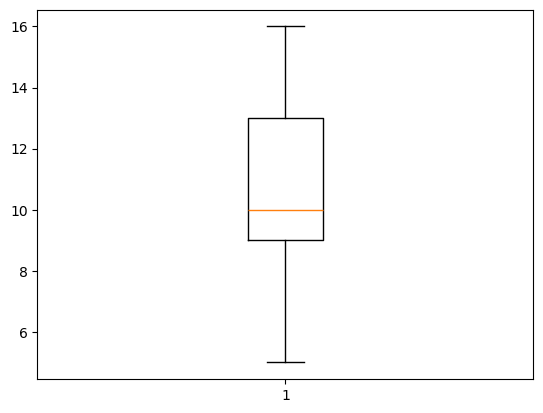

In [26]:
plt.boxplot(data['educational-num'])
plt.show()

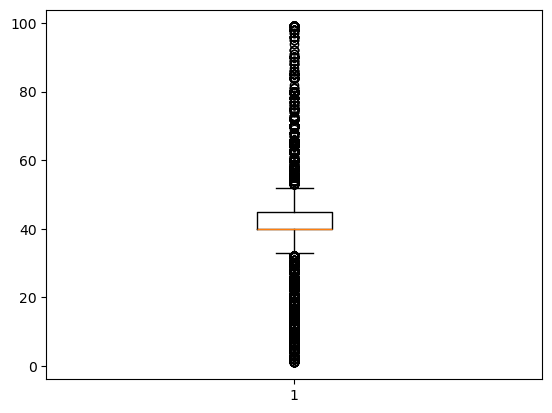

In [27]:
plt.boxplot(data['hours-per-week'])
plt.show()

In [28]:
data.shape

(46720, 15)

In [29]:
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [30]:
#Encode all categorical columns except the target
encoder=LabelEncoder()                       #create object
data['workclass']=encoder.fit_transform(data['workclass']) #7 categories   0,1, 2, 3, 4, 5, 6,
data['marital-status']=encoder.fit_transform(data['marital-status'])   #3 categories 0, 1, 2
data['occupation']=encoder.fit_transform(data['occupation'])
data['relationship']=encoder.fit_transform(data['relationship'])      #5 categories  0, 1, 2, 3, 4
 
data['gender']=encoder.fit_transform(data['gender'])    #2 catogories     0, 1
data['native-country']=encoder.fit_transform(data['native-country'])

In [31]:
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,2,226802,11th,7,4,6,3,Black,1,0,0,40,38,<=50K
1,38,2,89814,HS-grad,9,2,4,0,White,1,0,0,50,38,<=50K
2,28,1,336951,Assoc-acdm,12,2,10,0,White,1,0,0,40,38,>50K
3,44,2,160323,Some-college,10,2,6,0,Black,1,7688,0,40,38,>50K
4,18,2,103497,Some-college,10,4,9,3,White,0,0,0,30,38,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,2,257302,Assoc-acdm,12,2,12,5,White,0,0,0,38,38,<=50K
48838,40,2,154374,HS-grad,9,2,6,0,White,1,0,0,40,38,>50K
48839,58,2,151910,HS-grad,9,6,0,4,White,0,0,0,40,38,<=50K
48840,22,2,201490,HS-grad,9,4,0,3,White,1,0,0,20,38,<=50K


In [32]:
x=data.drop(columns=['income'])
y=data['income']
x

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,2,226802,11th,7,4,6,3,Black,1,0,0,40,38
1,38,2,89814,HS-grad,9,2,4,0,White,1,0,0,50,38
2,28,1,336951,Assoc-acdm,12,2,10,0,White,1,0,0,40,38
3,44,2,160323,Some-college,10,2,6,0,Black,1,7688,0,40,38
4,18,2,103497,Some-college,10,4,9,3,White,0,0,0,30,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,2,257302,Assoc-acdm,12,2,12,5,White,0,0,0,38,38
48838,40,2,154374,HS-grad,9,2,6,0,White,1,0,0,40,38
48839,58,2,151910,HS-grad,9,6,0,4,White,0,0,0,40,38
48840,22,2,201490,HS-grad,9,4,0,3,White,1,0,0,20,38


In [33]:
label = LabelEncoder()
data['income'] = label.fit_transform(data['income'])

In [34]:
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,2,226802,11th,7,4,6,3,Black,1,0,0,40,38,0
1,38,2,89814,HS-grad,9,2,4,0,White,1,0,0,50,38,0
2,28,1,336951,Assoc-acdm,12,2,10,0,White,1,0,0,40,38,1
3,44,2,160323,Some-college,10,2,6,0,Black,1,7688,0,40,38,1
4,18,2,103497,Some-college,10,4,9,3,White,0,0,0,30,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,2,257302,Assoc-acdm,12,2,12,5,White,0,0,0,38,38,0
48838,40,2,154374,HS-grad,9,2,6,0,White,1,0,0,40,38,1
48839,58,2,151910,HS-grad,9,6,0,4,White,0,0,0,40,38,0
48840,22,2,201490,HS-grad,9,4,0,3,White,1,0,0,20,38,0


In [35]:
# Remove outliers from capital gain and loss
for col in ['capital-gain', 'capital-loss']:
    quartile1= data[col].quantile(0.25)
    quartile2 = data[col].quantile(0.75)
    interquartilerange= quartile2 - quartile1
    data = data[(data[col] >= quartile1- 1.5 * interquartilerange) & (data[col] <= quartile2 + 1.5 * interquartilerange)]


In [36]:
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,2,226802,11th,7,4,6,3,Black,1,0,0,40,38,0
1,38,2,89814,HS-grad,9,2,4,0,White,1,0,0,50,38,0
2,28,1,336951,Assoc-acdm,12,2,10,0,White,1,0,0,40,38,1
4,18,2,103497,Some-college,10,4,9,3,White,0,0,0,30,38,0
5,34,2,198693,10th,6,4,7,1,White,1,0,0,30,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,22,2,310152,Some-college,10,4,10,1,White,1,0,0,40,38,0
48837,27,2,257302,Assoc-acdm,12,2,12,5,White,0,0,0,38,38,0
48838,40,2,154374,HS-grad,9,2,6,0,White,1,0,0,40,38,1
48839,58,2,151910,HS-grad,9,6,0,4,White,0,0,0,40,38,0


In [37]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer


# If not already, encode income as binary: <=50K → 0, >50K → 1
data['income'] = data['income'].replace({'<=50K': 0, '>50K': 1})

# Define x and y
x = data.drop(columns=['income'])
y = data['income']

# Handle missing values
x = x.fillna(0)
y = y.fillna(0)

# Split data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Feature types
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()

# Preprocessing: scale numericals, encode categoricals
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_cols),
    ("cat", OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

#Linear Regression
lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

lr_pipeline.fit(X_train, y_train)
y_pred_lr = lr_pipeline.predict(X_test)

# Convert regression output to binary using threshold 0.5
y_pred_lr_binary = [1 if val >= 0.5 else 0 for val in y_pred_lr]

print("\n📌 Linear Regression Output:")
print("✅ Accuracy (rounded output):", accuracy_score(y_test, y_pred_lr_binary))
print("📊 Classification Report:\n", classification_report(y_test, y_pred_lr_binary))
print("📐 R2 Score:", r2_score(y_test, y_pred_lr))
print("🎯 Mean Squared Error:", mean_squared_error(y_test, y_pred_lr))

#Randomn Forest Classifier
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier())
])

rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)

print("\n📌 Random Forest Classifier:")
print("✅ Accuracy:", accuracy_score(y_test, y_pred_rf))
print("📊 Classification Report:\n", classification_report(y_test, y_pred_rf))

#KNN
knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', KNeighborsClassifier())
])

knn_pipeline.fit(X_train, y_train)
y_pred_knn = knn_pipeline.predict(X_test)

print("\n📌 K-Nearest Neighbors Classifier:")
print("✅ Accuracy:", accuracy_score(y_test, y_pred_knn))
print("📊 Classification Report:\n", classification_report(y_test, y_pred_knn))



📌 Linear Regression Output:
✅ Accuracy (rounded output): 0.8248615384615384
📊 Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.98      0.90      6560
           1       0.67      0.18      0.28      1565

    accuracy                           0.82      8125
   macro avg       0.75      0.58      0.59      8125
weighted avg       0.80      0.82      0.78      8125

📐 R2 Score: 0.20185759012360893
🎯 Mean Squared Error: 0.12412287601238313

📌 Random Forest Classifier:
✅ Accuracy: 0.8429538461538462
📊 Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.91      6560
           1       0.62      0.48      0.54      1565

    accuracy                           0.84      8125
   macro avg       0.75      0.70      0.72      8125
weighted avg       0.83      0.84      0.84      8125


📌 K-Nearest Neighbors Classifier:
✅ Accuracy: 0.8345846153846154
📊 Classification 

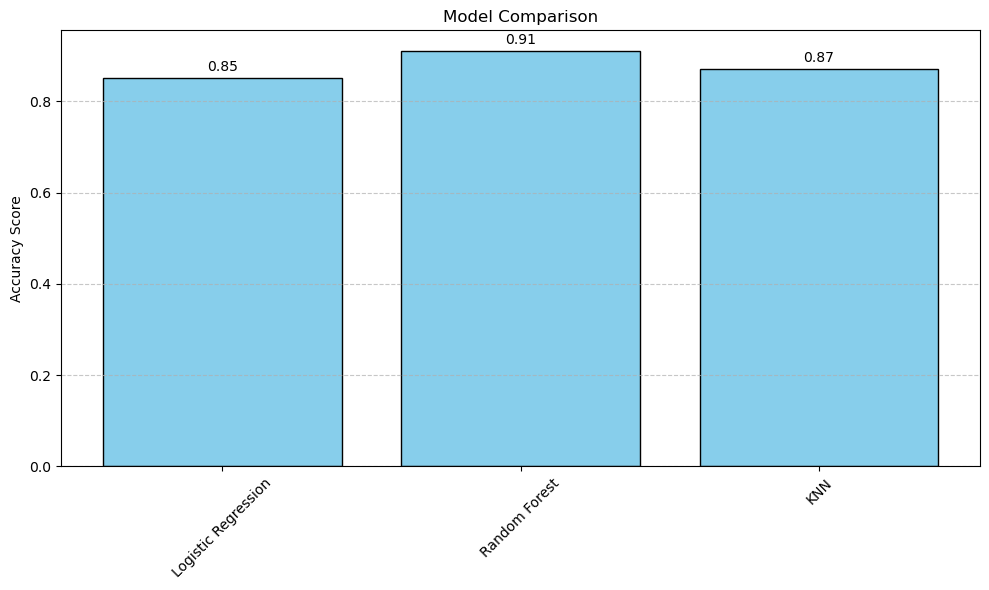

In [38]:
import matplotlib.pyplot as plt


results = {
    'Logistic Regression': 0.85,
    'Random Forest': 0.91,
    'KNN': 0.87
}

plt.figure(figsize=(10, 6))
bars = plt.bar(results.keys(), results.values(), color='skyblue', edgecolor='black')


for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.01, f'{height:.2f}', ha='center', va='bottom')

plt.ylabel('Accuracy Score')
plt.title('Model Comparison')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import joblib




data.replace('?', np.nan, inplace=True)
for col in data.columns:
    if data[col].isnull().sum() > 0:
        data[col] = data[col].fillna(data[col].mode()[0])


x = pd.get_dummies(data.drop(columns=['income']), drop_first=True)  
le = LabelEncoder()
y = le.fit_transform(data['income'])  


scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)


X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)


models = {
    "LogisticRegression": LogisticRegression(max_iter=5000),  # Increased iterations
    "RandomForest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "GradientBoosting": GradientBoostingClassifier()
}


results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    results[name] = acc
    print(f"{name}: {acc:.4f}")

# 8. Get the best model
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print(f"\n✅ Best model: {best_model_name} with accuracy {results[best_model_name]:.4f}")

# 9. Save the best model and scaler
joblib.dump(best_model, "best_model.pkl")
joblib.dump(scaler, "scaler.pkl")
print("✅ Saved best model as 'best_model.pkl' and scaler as 'scaler.pkl'")


LogisticRegression: 0.8294
RandomForest: 0.8423
KNN: 0.8329
SVM: 0.8469
GradientBoosting: 0.8585

✅ Best model: GradientBoosting with accuracy 0.8585
✅ Saved best model as 'best_model.pkl' and scaler as 'scaler.pkl'


In [40]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib

# Load the trained model
model = joblib.load("best_model.pkl")

st.set_page_config(page_title="Employee Salary Classification", page_icon="💼", layout="centered")

st.title("💼 Employee Salary Classification App")
st.markdown("Predict whether an employee earns >50K or ≤50K based on input features.")

# Sidebar inputs (these must match your training feature columns)
st.sidebar.header("Input Employee Details")

# ✨ Replace these fields with your dataset's actual input columns
age = st.sidebar.slider("Age", 18, 65, 30)
education = st.sidebar.selectbox("Education Level", [
    "Bachelors", "Masters", "PhD", "HS-grad", "Assoc", "Some-college"
])
occupation = st.sidebar.selectbox("Job Role", [
    "Tech-support", "Craft-repair", "Other-service", "Sales",
    "Exec-managerial", "Prof-specialty", "Handlers-cleaners", "Machine-op-inspct",
    "Adm-clerical", "Farming-fishing", "Transport-moving", "Priv-house-serv",
    "Protective-serv", "Armed-Forces"
])
hours_per_week = st.sidebar.slider("Hours per week", 1, 80, 40)
experience = st.sidebar.slider("Years of Experience", 0, 40, 5)

# Build input DataFrame (⚠️ must match preprocessing of your training data)
input_df = pd.DataFrame({
    'age': [age],
    'education': [education],
    'occupation': [occupation],
    'hours-per-week': [hours_per_week],
    'experience': [experience]
})

st.write("### 🔎 Input Data")
st.write(input_df)

# Predict button
if st.button("Predict Salary Class"):
    prediction = model.predict(input_df)
    st.success(f"✅ Prediction: {prediction[0]}")

# Batch prediction
st.markdown("---")
st.markdown("#### 📂 Batch Prediction")
uploaded_file = st.file_uploader("Upload a CSV file for batch prediction", type="csv")

if uploaded_file is not None:
    batch_data = pd.read_csv(uploaded_file)
    st.write("Uploaded data preview:", batch_data.head())
    batch_preds = model.predict(batch_data)
    batch_data['PredictedClass'] = batch_preds
    st.write("✅ Predictions:")
    st.write(batch_data.head())
    csv = batch_data.to_csv(index=False).encode('utf-8')
    st.download_button("Download Predictions CSV", csv, file_name='predicted_classes.csv', mime='text/csv')

Overwriting app.py


In [ ]:
!streamlit run app.py